In [2]:
# import the data for books

import json

with open('/Users/sunnyyu/Desktop/research/children_speech_books/code/python/generics/SPEECH_QUANTIFIERS.json', 'r') as file:
    generics_data = json.load(file)

In [4]:
# examine all the generics in the book dataset

from collections import defaultdict

excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}


def process_and_print_generics_sentences(book_data):
    generics_sentences = defaultdict(list)  # Dictionary to store generics sentences per entity
    
    for sentence_data in book_data:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        quantifier = sentence_data.get('quantified_classification')
        sentence_text = sentence_data.get('sentence', 'No sentence provided')
        
        if quantifier == "Existential Quantifier":  # Check if the category is for generics
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:  # Ensure the subject is not a pronoun
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories:
                                generics_sentences[entity].append(sentence_text)

    # Print the generics sentences for each entity kind
    for entity, sentences in generics_sentences.items():
        print(f"Entity: {entity}")
        for sentence in sentences:
            print(f"  Sentence: {sentence}")

# Example usage:
process_and_print_generics_sentences(generics_data)

Entity: Artifacts
  Sentence: there's some toys in that bag
  Sentence: there's a truck running me over
  Sentence: here's a saw and a hammer
  Sentence: yes there's a toy
  Sentence: yes there's a balloon in the dining room
  Sentence: let's see if there's a picture of that
  Sentence: there's a chair
  Sentence: there's a chair and a bed
  Sentence: there's a hook
  Sentence: a barbecue is when you put the hot dogs and the hamburgers on the grill
  Sentence: okay here's one shoe now could you bring me the other one please
  Sentence: there's a snowman in your poems book
  Sentence: there's a window too I see
  Sentence: there's one page that might have a moon
  Sentence: maybe there's a knife in here
  Sentence: how many cups do you think there are here
  Sentence: there was a balloon that looked like a hotdog and you threw it to Michael
  Sentence: see there's a circle on the end and it's long in the middle it's called a cylinder
  Sentence: there's a barn
  Sentence: there's a ladd

In [3]:
# examine all the generalizing sentences

from collections import defaultdict

excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}


def process_and_print_generics_sentences(book_data):
    generics_sentences = defaultdict(list)  # Dictionary to store generics sentences per entity


    for sentence_data in book_data:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        sentence_text = sentence_data.get('sentence', 'No sentence provided')
        
        if category == 4:  # Check if the category is for generalizing
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:  # Ensure the subject is not a pronoun
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories:
                                generics_sentences[entity].append(sentence_text)

    # Print the generics sentences for each entity kind
    for entity, sentences in generics_sentences.items():
        print(f"Entity: {entity}")
        for sentence in sentences:
            print(f"  Sentence: {sentence}")

# Example usage:
process_and_print_generics_sentences(generics_data)

Entity: Biological Kind
  Sentence: we call that one a tiger
  Sentence: like King Friday King Friday always wears a crown
  Sentence: Shalom usually plays with a ribbon doesn't she
  Sentence: and whenever I say there's a camel she starts to smile cause she thinks it's ridiculous when I make that sound
  Sentence: you guys play all the time together
  Sentence: Paul plays with his little sister
  Sentence: Andreas always wanted to take his in the bath+tub because Ernie on Sesame Street has a rubber duckie and he takes
  Sentence: Andreas always wanted to take his in the bath+tub because Ernie on Sesame Street has a rubber duckie and he takes
  Sentence: and this truck comes around when people build new buildings
  Sentence: Paul and Judy Paul and Judy play with the bunny
  Sentence: Paul and Judy Paul and Judy play with the bunny
  Sentence: you use it when you say Oscar's only ostrich oiled an orange
  Sentence: this dog never got a name did he
  Sentence: I use eat yes I do I don't 

In [4]:
import json
from collections import defaultdict

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][category] += 1


process_book(generics_data)

# Convert defaultdict to dict for better readability
tag_categories = {k: dict(v) for k, v in tag_categories.items()}

# Calculate the total count for each tag category
total_counts = {entity: sum(categories.values()) for entity, categories in tag_categories.items()}

# Calculate proportions
tag_proportions = {
    entity: {category: count / total_counts[entity] for category, count in categories.items()}
    for entity, categories in tag_categories.items()
}

# Print the counts and proportions
for entity, categories in tag_categories.items():
    print(f"Entity: {entity}")
    for category, count in categories.items():
        proportion = tag_proportions[entity][category]
        print(f"  Category {category}: Count = {count}, Proportion = {proportion:.2%}")

Entity: Non-Living Kind
  Category 9: Count = 53, Proportion = 1.49%
  Category 1: Count = 655, Proportion = 18.42%
  Category 0: Count = 1406, Proportion = 39.55%
  Category 6: Count = 124, Proportion = 3.49%
  Category 5: Count = 337, Proportion = 9.48%
  Category 7: Count = 68, Proportion = 1.91%
  Category 8: Count = 105, Proportion = 2.95%
  Category 4: Count = 53, Proportion = 1.49%
  Category 2: Count = 37, Proportion = 1.04%
  Category 3: Count = 113, Proportion = 3.18%
  Category None: Count = 604, Proportion = 16.99%
Entity: Social Kind/Role
  Category 0: Count = 6179, Proportion = 41.02%
  Category 5: Count = 2084, Proportion = 13.84%
  Category 1: Count = 2261, Proportion = 15.01%
  Category 2: Count = 387, Proportion = 2.57%
  Category 6: Count = 635, Proportion = 4.22%
  Category 3: Count = 311, Proportion = 2.06%
  Category 7: Count = 143, Proportion = 0.95%
  Category 4: Count = 390, Proportion = 2.59%
  Category 8: Count = 375, Proportion = 2.49%
  Category 9: Count = 

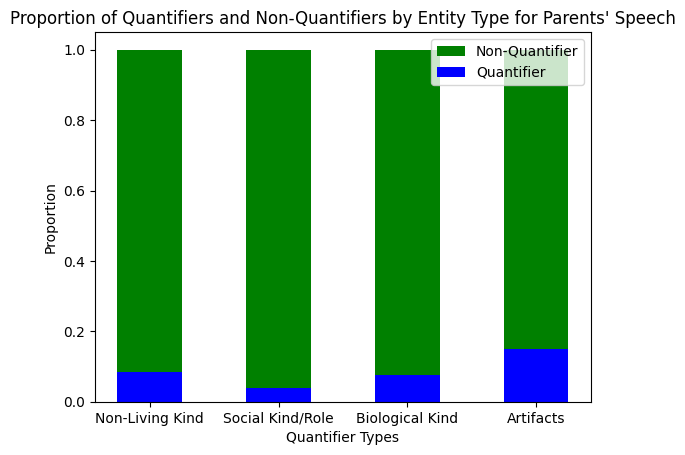

In [9]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        quantifier = sentence_data.get('quantified_classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][quantifier] += 1


process_book(generics_data)

# Convert defaultdict to dict for better readability
tag_categories = {k: dict(v) for k, v in tag_categories.items()}

# Calculate the total count for each tag category
total_counts = {entity: sum(categories.values()) for entity, categories in tag_categories.items()}

# Calculate proportions
tag_proportions = {
    entity: {category: count / total_counts[entity] for category, count in categories.items()}
    for entity, categories in tag_categories.items()
}

# Extract proportions for category 3 (Generics) and category 4 (Generalizing)
# generics_proportions = {entity: proportions.get("Universal Quantifier", 0) for entity, proportions in tag_proportions.items()}
# generalizing_proportions = {entity: proportions.get("Existential Quantifier", 0) for entity, proportions in tag_proportions.items()}
generics_proportions = {entity: proportions.get("Universal Quantifier", 0) + proportions.get("Existential Quantifier", 0) for entity, proportions in tag_proportions.items()}
generalizing_proportions = {entity: proportions.get("Neither", 0) for entity, proportions in tag_proportions.items()}

# Plotting
fig, ax = plt.subplots()
entities = list(generics_proportions.keys())
x = range(len(entities))  # the label locations
width = 0.5  # the width of the bars

rects1 = ax.bar(x, [generics_proportions[entity] for entity in entities], width, label='Quantifier', color='blue')
rects2 = ax.bar(x, [generalizing_proportions[entity] for entity in entities], width, bottom=[generics_proportions[entity] for entity in entities], label='Non-Quantifier', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Quantifier Types')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Quantifiers and Non-Quantifiers by Entity Type for Parents\' Speech')
ax.set_xticks(x)
ax.set_xticklabels(entities)

# Reverse the order of the legend entries
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

plt.show()

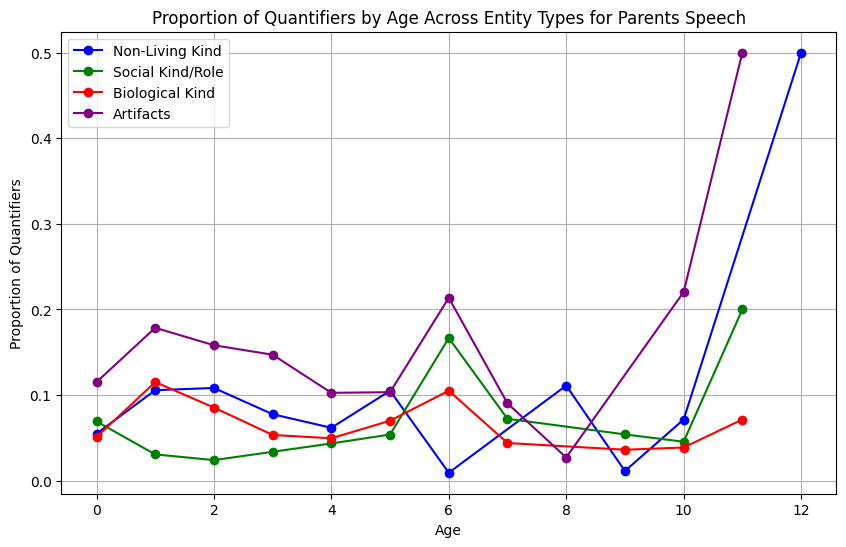

In [13]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import math  # Import math module

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(Counter),
    'Social Kind/Role': defaultdict(Counter),
    'Biological Kind': defaultdict(Counter),
    'Artifacts': defaultdict(Counter)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        age_min = sentence_data.get('age_min')
        age_max = sentence_data.get('age_max')
        quantifier = sentence_data.get('quantified_classification')

        # Check if age_min or age_max is None or NaN
        if age_min is None or age_max is None or math.isnan(age_min) or math.isnan(age_max):
            continue  # Skip this entry

        age_min = int(age_min)
        age_max = int(age_max)
        
        for age in range(age_min, age_max + 1):
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories:
                                tag_categories[entity][age][quantifier] += 1

process_book(generics_data)

# Calculate the proportion of category 3 across ages for each entity
age_proportions = defaultdict(dict)
for entity, age_data in tag_categories.items():
    for age, categories in age_data.items():
        total = sum(categories.values())
        #if total > 0 and 3 in categories:
        if total > 0 and "Existential Quantifier" in categories:
            #age_proportions[entity][age] = categories["Existential Quantifier"] / total
            #age_proportions[entity][age] = categories[3] / total
            universal = categories.get("Universal Quantifier", 0)
            existential = categories.get("Existential Quantifier", 0)
            age_proportions[entity][age] = (universal + existential) / total

# Plotting the results in one plot with different colors
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors for the lines
for (entity, age_data), color in zip(age_proportions.items(), colors):
    ages = sorted(age_data.keys())
    proportions = [age_data[age] for age in ages]
    plt.plot(ages, proportions, marker='o', linestyle='-', label=entity, color=color)

plt.title('Proportion of Quantifiers by Age Across Entity Types for Parents Speech')
plt.xlabel('Age')
plt.ylabel('Proportion of Quantifiers')
plt.grid(True)
plt.legend()  # Add a legend to identify the lines
plt.show()

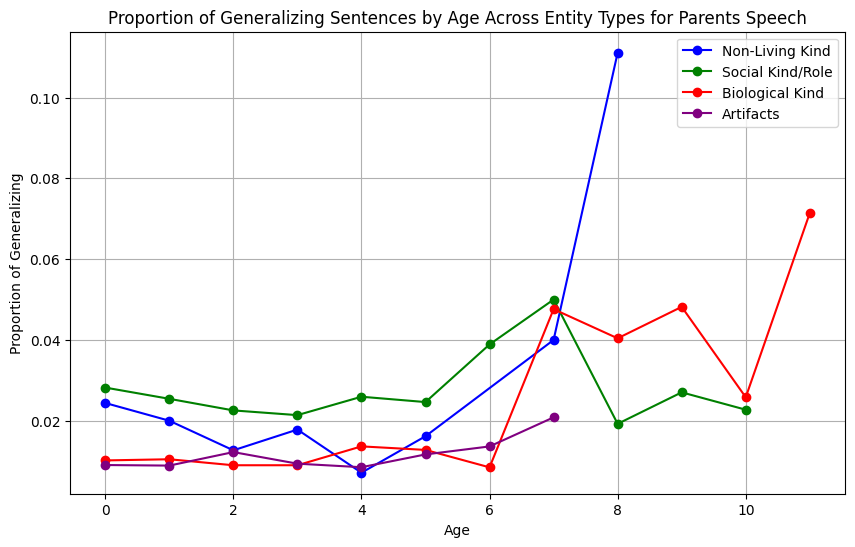

In [8]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import math  # Import math module

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(Counter),
    'Social Kind/Role': defaultdict(Counter),
    'Biological Kind': defaultdict(Counter),
    'Artifacts': defaultdict(Counter)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        age_min = sentence_data.get('age_min')
        age_max = sentence_data.get('age_max')

        # Check if age_min or age_max is None or NaN
        if age_min is None or age_max is None or math.isnan(age_min) or math.isnan(age_max):
            continue  # Skip this entry

        age_min = int(age_min)
        age_max = int(age_max)
        
        for age in range(age_min, age_max + 1):
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories:
                                tag_categories[entity][age][category] += 1

process_book(generics_data)

# Calculate the proportion of category 3 across ages for each entity
age_proportions = defaultdict(dict)
for entity, age_data in tag_categories.items():
    for age, categories in age_data.items():
        total = sum(categories.values())
        if total > 0 and 4 in categories:
            age_proportions[entity][age] = categories[4] / total

# Plotting the results in one plot with different colors
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors for the lines
for (entity, age_data), color in zip(age_proportions.items(), colors):
    ages = sorted(age_data.keys())
    proportions = [age_data[age] for age in ages]
    plt.plot(ages, proportions, marker='o', linestyle='-', label=entity, color=color)

plt.title('Proportion of Generalizing Sentences by Age Across Entity Types for Parents Speech')
plt.xlabel('Age')
plt.ylabel('Proportion of Generalizing')
plt.grid(True)
plt.legend()  # Add a legend to identify the lines
plt.show()

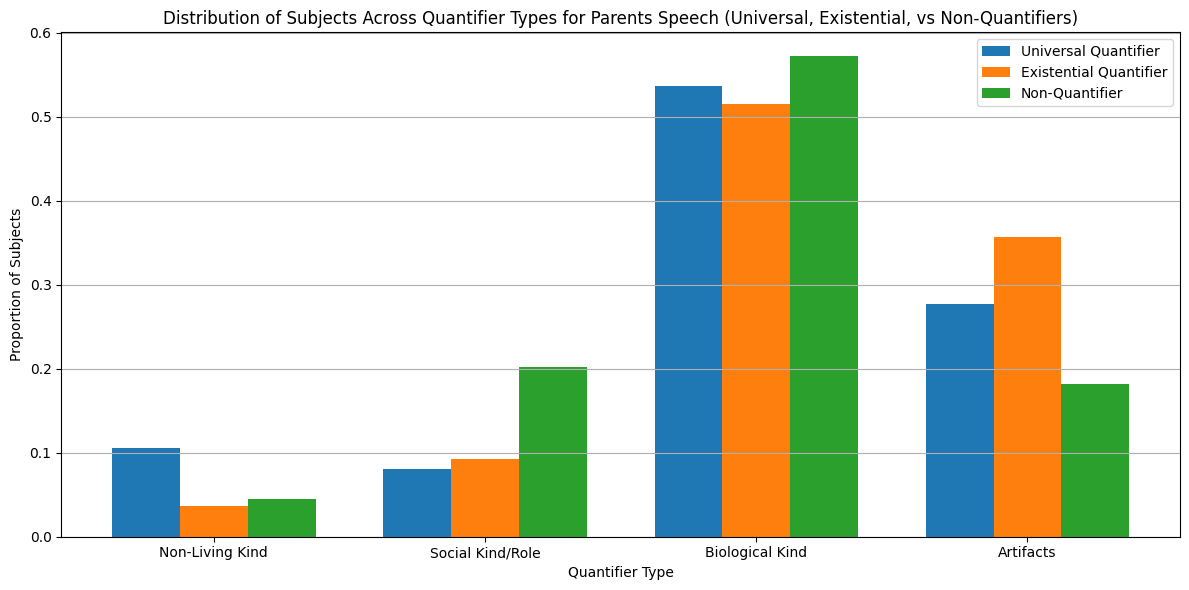

Generic Counts and Proportions:
Entity: Non-Living Kind
  Total Count = 100, Proportion = 10.57%
Entity: Social Kind/Role
  Total Count = 76, Proportion = 8.03%
Entity: Biological Kind
  Total Count = 508, Proportion = 53.70%
Entity: Artifacts
  Total Count = 262, Proportion = 27.70%

Generalizing Counts and Proportions:
Entity: Non-Living Kind
  Total Count = 204, Proportion = 3.61%
Entity: Social Kind/Role
  Total Count = 520, Proportion = 9.20%
Entity: Biological Kind
  Total Count = 2912, Proportion = 51.49%
Entity: Artifacts
  Total Count = 2019, Proportion = 35.70%

Non-Generic Counts and Proportions:
Entity: Non-Living Kind
  Total Count = 3251, Proportion = 4.53%
Entity: Social Kind/Role
  Total Count = 14467, Proportion = 20.14%
Entity: Biological Kind
  Total Count = 41059, Proportion = 57.17%
Entity: Artifacts
  Total Count = 13043, Proportion = 18.16%


In [14]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize dictionaries to store counts for generics, generalizing, and non-generics
generic_counts = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

generalizing_counts = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

non_generic_counts = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        quantifier = sentence_data.get('quantified_classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in generic_counts:
                            if quantifier == "Universal Quantifier":
                                generic_counts[entity][category] += 1
                            elif quantifier == "Existential Quantifier":
                                generalizing_counts[entity][category] += 1
                            elif quantifier == "Neither":
                                non_generic_counts[entity][category] += 1


process_book(generics_data)

# Calculate total counts and proportions for generics, generalizing, and non-generics
total_generic_counts = {entity: sum(categories.values()) for entity, categories in generic_counts.items()}
total_generalizing_counts = {entity: sum(categories.values()) for entity, categories in generalizing_counts.items()}
total_non_generic_counts = {entity: sum(categories.values()) for entity, categories in non_generic_counts.items()}

generic_proportions = {
    entity: (total_generic_counts[entity] / sum(total_generic_counts.values())) if sum(total_generic_counts.values()) > 0 else 0
    for entity in generic_counts
}

generalizing_proportions = {
    entity: (total_generalizing_counts[entity] / sum(total_generalizing_counts.values())) if sum(total_generalizing_counts.values()) > 0 else 0
    for entity in generalizing_counts
}

non_generic_proportions = {
    entity: (total_non_generic_counts[entity] / sum(total_non_generic_counts.values())) if sum(total_non_generic_counts.values()) > 0 else 0
    for entity in non_generic_counts
}

# Plot the proportions for generics, generalizing, and non-generics
entity_types = list(generic_counts.keys())
x = range(len(entity_types))
width = 0.25  # Bar width

plt.figure(figsize=(12, 6))

# Plot generics
plt.bar([i - width for i in x], [generic_proportions[entity] for entity in entity_types], width=width, label='Universal Quantifier', align='center')

# Plot generalizing
plt.bar(x, [generalizing_proportions[entity] for entity in entity_types], width=width, label='Existential Quantifier', align='center')

# Plot non-generics
plt.bar([i + width for i in x], [non_generic_proportions[entity] for entity in entity_types], width=width, label='Non-Quantifier', align='center')

plt.xticks(x, entity_types)
plt.title('Distribution of Subjects Across Quantifier Types for Parents Speech (Universal, Existential, vs Non-Quantifiers)')
plt.xlabel('Quantifier Type')
plt.ylabel('Proportion of Subjects')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print the counts and proportions for each entity type
print("Generic Counts and Proportions:")
for entity, categories in generic_counts.items():
    count = total_generic_counts[entity]
    proportion = generic_proportions[entity]
    print(f"Entity: {entity}")
    print(f"  Total Count = {count}, Proportion = {proportion:.2%}")

print("\nGeneralizing Counts and Proportions:")
for entity, categories in generalizing_counts.items():
    count = total_generalizing_counts[entity]
    proportion = generalizing_proportions[entity]
    print(f"Entity: {entity}")
    print(f"  Total Count = {count}, Proportion = {proportion:.2%}")

print("\nNon-Generic Counts and Proportions:")
for entity, categories in non_generic_counts.items():
    count = total_non_generic_counts[entity]
    proportion = non_generic_proportions[entity]
    print(f"Entity: {entity}")
    print(f"  Total Count = {count}, Proportion = {proportion:.2%}")
